In [49]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
from matplotlib.lines import Line2D
import pandas as pd
from b_Soft_WL_Kernel.SoftWL import compute_cluster_centroids
from definitions import get_cell_phenotype_id

### Parameters

In [50]:
iteration = 2
PhenoGraph_k =  100

### Discovery (subset 1)

In [51]:
# Retrive cluster data
FILE_NAMES = os.listdir(
    os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Danenberg", "Subset_1", 'Subtrees')
)
INPUT_ROOT = os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Danenberg", "Subset_1", 'Subtrees')
X = []
Cluster_identities = []
Indices = []
for i in range(len(FILE_NAMES)):
    file_name = FILE_NAMES[i]
    x = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "neighborhood_aggregation",
            "X" + str(iteration) + ".npy",
        )
    )
    cluster_identities = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "pattern_ids",
            "pattern_id_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".npy",
        )
    )
    indices = np.zeros(x.shape[0], dtype=int)
    indices[:] = i

    Indices.append(indices)
    X.append(x)
    Cluster_identities.append(cluster_identities)
X = np.concatenate(X, axis=0)
Cluster_identities = np.concatenate(Cluster_identities, axis=0)
Indices = np.concatenate(Indices, axis=0)

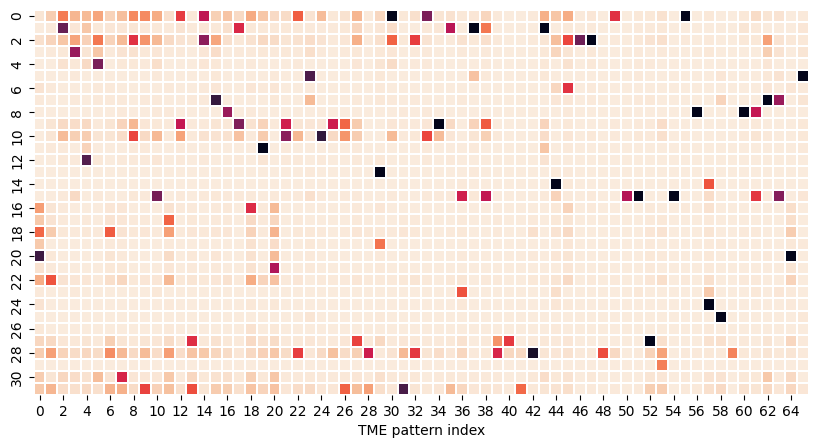

In [52]:


Centroids = compute_cluster_centroids(X, Cluster_identities)
f, ax= plt.subplots(figsize=(10,5) )
sns.heatmap(
            Centroids.T,
            ax=ax,
            cbar=False,
            cmap="rocket_r",
            linewidth=0.005,
            edgecolor="black",
            vmax=4,
            vmin=0,
        )
    
Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
ax.set_xlabel("TME pattern index", fontsize=10)
plt.show()


### Discovery (subset 2)

In [53]:
# Retrive cluster data
FILE_NAMES = os.listdir(
    os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Danenberg", "Subset_2", 'Subtrees')
)
INPUT_ROOT = os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Danenberg", "Subset_2", 'Subtrees')
X = []
Cluster_identities = []
Indices = []
for i in range(len(FILE_NAMES)):
    file_name = FILE_NAMES[i]
    x = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "neighborhood_aggregation",
            "X" + str(iteration) + ".npy",
        )
    )
    cluster_identities = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "matched_pattern_ids_centroid_alignment",
            "pattern_id_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".npy",
        )
    ).reshape(-1)
    indices = np.zeros(x.shape[0], dtype=int)
    indices[:] = i

    Indices.append(indices)
    X.append(x)
    Cluster_identities.append(cluster_identities)
X = np.concatenate(X, axis=0)
Cluster_identities = np.concatenate(Cluster_identities, axis=0)
Indices = np.concatenate(Indices, axis=0)

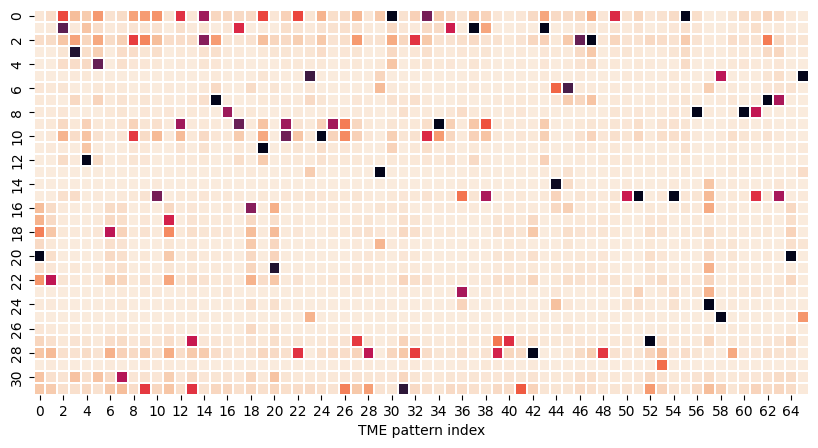

In [54]:
Centroids = compute_cluster_centroids(X, Cluster_identities)
f, ax= plt.subplots(figsize=(10,5) )
sns.heatmap(
            Centroids.T,
            ax=ax,
            cbar=False,
            cmap="rocket_r",
            linewidth=0.005,
            edgecolor="black",
            vmax=4,
            vmin=0,
        )
    
Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
# ax.set_xticklabels(Cell_type_name_list + ['label'], rotation=90, fontsize=10)
ax.set_xlabel("TME pattern index", fontsize=10)
plt.show()


### Validation set

In [55]:
# Retrive cluster data
FILE_NAMES = os.listdir(
    os.path.join(
        PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Jackson", "Subtrees"
    )
)
INPUT_ROOT = os.path.join(
    PROJECT_ROOT, "Output", "b_Soft_WL_Kernel_random_split", "Jackson", "Subtrees"
)
X = []
Cluster_identities = []
Indices = []
for i in range(len(FILE_NAMES)):
    file_name = FILE_NAMES[i]
    x = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "neighborhood_aggregation",
            "matched_X" + str(iteration) + "_centroid_alignment.npy",
        )
    )
    cluster_identities = np.load(
        os.path.join(
            INPUT_ROOT,
            file_name,
            "matched_pattern_ids_centroid_alignment",
            "pattern_id_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            + ".npy",
        )
    ).reshape(-1)
    indices = np.zeros(x.shape[0], dtype=int)
    indices[:] = i

    Indices.append(indices)
    X.append(x)
    Cluster_identities.append(cluster_identities)
X = np.concatenate(X, axis=0)
Cluster_identities = np.concatenate(Cluster_identities, axis=0)
Indices = np.concatenate(Indices, axis=0)

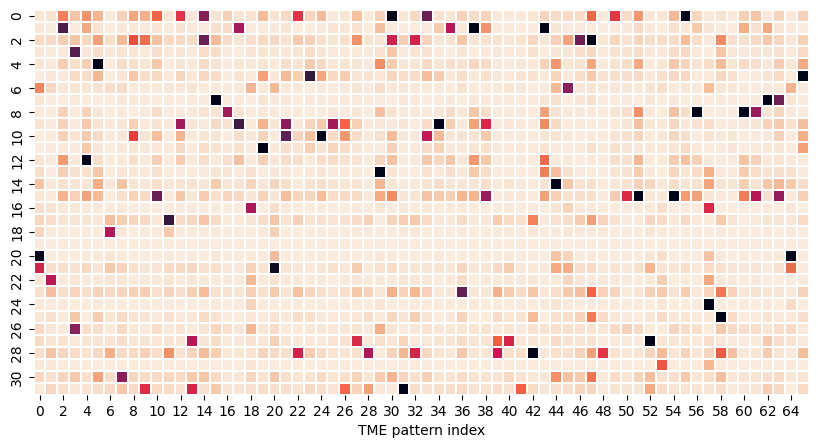

In [56]:
Centroids = compute_cluster_centroids(X, Cluster_identities)
f, ax= plt.subplots(figsize=(10,5) )
sns.heatmap(
            Centroids.T,
            ax=ax,
            cbar=False,
            cmap="rocket_r",
            linewidth=0.005,
            edgecolor="black",
            vmax=4,
            vmin=0,
        )
    
Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
# ax.set_xticklabels(Cell_type_name_list + ['label'], rotation=90, fontsize=10)
ax.set_xlabel("TME pattern index", fontsize=10)
plt.show()
